<a href="https://colab.research.google.com/github/jhChoi1997/EE488_AI_Convergence_Capstone_Design_Anomaly_Detection_2022spring/blob/main/Experiment2/Assignment_2_Audio_Data_Preprocessing_Answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EE488 AI Convergence Capstone Design : Anomaly Detection**

##**Assignment 2 (Audio Data Preprocessing)**

In [1]:
!gdown https://drive.google.com/uc?id=18Mm7JjrTstMN7EuV8YBpUEiQX_rV0nYk
!unzip dataset.zip
!mkdir data
!mv ToyCar fan valve data

Downloading...
From: https://drive.google.com/uc?id=18Mm7JjrTstMN7EuV8YBpUEiQX_rV0nYk
To: /content/dataset.zip
100% 5.55M/5.55M [00:00<00:00, 165MB/s]
Archive:  dataset.zip
   creating: fan/
  inflating: fan/anomaly_id_00_00000010.wav  
  inflating: fan/anomaly_id_02_00000000.wav  
  inflating: fan/anomaly_id_04_00000012.wav  
  inflating: fan/anomaly_id_06_00000002.wav  
  inflating: fan/normal_id_00_00000007.wav  
  inflating: fan/normal_id_02_00000012.wav  
  inflating: fan/normal_id_04_00000006.wav  
  inflating: fan/normal_id_06_00000015.wav  
   creating: ToyCar/
  inflating: ToyCar/anomaly_id_01_00000019.wav  
  inflating: ToyCar/anomaly_id_02_00000018.wav  
  inflating: ToyCar/anomaly_id_03_00000003.wav  
  inflating: ToyCar/normal_id_01_00000010.wav  
  inflating: ToyCar/normal_id_02_00000013.wav  
  inflating: ToyCar/normal_id_03_00000013.wav  
   creating: valve/
  inflating: valve/anomaly_id_00_00000023.wav  
  inflating: valve/anomaly_id_02_00000016.wav  
  inflating: valv

basic setting

In [2]:
import librosa
import numpy as np
file_dir= './data/ToyCar/normal_id_01_00000010.wav'
y, sr = librosa.load(file_dir, sr = 16000)

In [3]:
import IPython.display as ipd
ipd.Audio(data=y,rate=sr)

In [4]:
hop_length = 512
n_fft = 2048
Y = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
D = np.abs(Y)**2 
S = librosa.feature.melspectrogram(S=D, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)

Text(0.5, 1.0, './data/ToyCar/normal_id_01_00000010.wav')

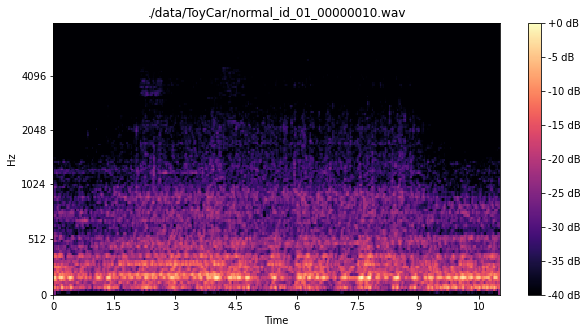

In [5]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 5))
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', vmin=-40, vmax=0, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('./data/ToyCar/normal_id_01_00000010.wav')

1-2-a. Front End System : High Pass Filter using scipy (1pts)

Use Butterworth filter

In [6]:
import scipy
from scipy import signal
#============================================
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html#scipy.signal.butter
# 10th order butterworth filter
# critical frequency (cutoff frequency) 500hz
lpf = signal.butter(10,500,'high',fs=sr, output = 'sos')
#============================================
yh = signal.sosfilt(lpf,y)
print(yh.shape)

(176000,)


In [7]:
ipd.Audio(data=yh,rate=sr)

In [8]:
hop_length = 512
n_fft = 2048
Y = librosa.stft(yh, n_fft=n_fft, hop_length=hop_length)
D = np.abs(Y)**2 
S = librosa.feature.melspectrogram(S=D, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)

Text(0.5, 1.0, './data/ToyCar/normal_id_01_00000010.wav')

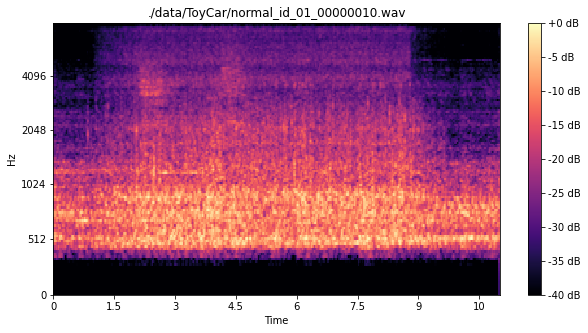

In [9]:
plt.figure(figsize=(10, 5))
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', vmin=-40, vmax=0, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('./data/ToyCar/normal_id_01_00000010.wav')

1-2-b. Front End System : Teager-Kaiser Energy Operator (TKEO) (1pts)

basic setting (temporal signal)

In [10]:
file_dir= './data/valve/normal_id_00_00000026.wav'
y, sr = librosa.load(file_dir, sr = 16000)

In [11]:
ipd.Audio(data=y,rate=sr)

In [12]:
hop_length = 512
n_fft = 2048
Y = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
D = np.abs(Y)**2 
S = librosa.feature.melspectrogram(S=D, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)

Text(0.5, 1.0, './data/valve/normal_id_00_00000026.wav')

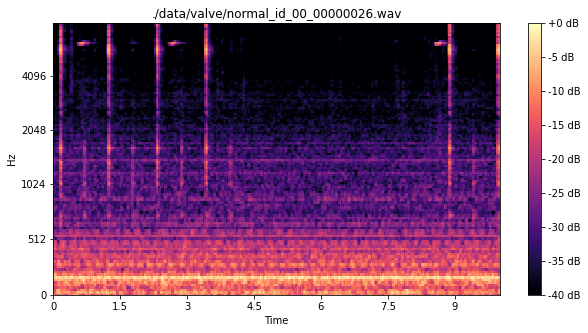

In [13]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 5))
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', vmin=-40, vmax=0, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('./data/valve/normal_id_00_00000026.wav')

Ψ[x(n)] = x²(n) - x(n+1)x(n-1)

In [25]:
#============================================
# How can we implement above equation?
ytk = (y[1:-1]*y[1:-1] - y[2:]*y[0:-2])
#============================================

In [29]:
ytk_sig = np.sqrt(np.abs(ytk))
print(ytk_sig.shape)
ipd.Audio(data=ytk_sig,rate=sr)

(159998,)


In [30]:
hop_length = 512
n_fft = 2048
Y = librosa.stft(ytk_sig, n_fft=n_fft, hop_length=hop_length)
D = np.abs(Y)**2
S = librosa.feature.melspectrogram(S=D, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)

Text(0.5, 1.0, './data/valve/normal_id_00_00000026.wav')

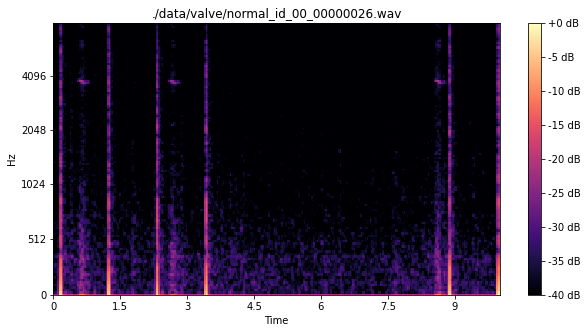

In [31]:
plt.figure(figsize=(10, 5))
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', vmin=-40, vmax=0, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('./data/valve/normal_id_00_00000026.wav')

1-3-a. Data Augmentation : Time Warping (1pts)

1-3-b. Data Augmentation : Mix up (1pts)

1-3-c. Data Augmentation : Data for Segmentation (1pts)